In [1]:
from PIL import Image
from pylab import *
goruntu = Image.open("ai image with noisy.jpg")

In [9]:
def affine_transform(goruntu,scale=(1,1),kayma=(0,0),donme=0,translate=(0,0),aynalama=(1,1)):
  k_x, k_y = kayma
  tx, ty = translate
  ax,ay = aynalama
  theta = donme
  sx,sy = scale

  x_kayma_matris = matrix([[1, k_x, 0],[0,1,0],[0,0,1]])
  y_kayma_matris = matrix([[1, 0, 0],[k_y,1,0],[0,0,1]])

  donme_matris = matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
  scale_matris = matrix([[sx,0,0],[0,sy,0],[0,0,1]])
  aynalama_matris = matrix([[ax,0,0],[0,ay,0],[0,0,1]])
  oteleme = matrix([[1,0,tx],[0,1,ty],[0,0,1]])

  trans_matris = donme_matris * y_kayma_matris
  trans_matris *= x_kayma_matris * scale_matris * aynalama_matris
  trans_matris += oteleme

  w, h = goruntu.size

  once = []
  x,y=[],[]

  once.append(array([[0,0,1]]).transpose())
  once.append(array([[w-1,0,1]]).transpose())
  once.append(array([[0,h-1,1]]).transpose())
  once.append(array([[w-1,h-1,1]]).transpose())

  for i in range(len(once)):
    sonra = trans_matris * once[i]
    x.append(sonra[0,0])
    y.append(sonra[1,0])
  yeni_yukseklik = int(round(max(y)-min(y))) +1
  yeni_genislik = int(round(max(x)-min(x))) +1

  trans_matris = matrix([[1,0,-min(x)],[0,1,-min(y)],[0,0,1]]) * trans_matris
  t_inv = linalg.inv(trans_matris)
  t_inv_tuple = (t_inv[0,0],t_inv[0,1],t_inv[0,2],t_inv[1,0],t_inv[1,1],t_inv[1,2])

  return t_inv_tuple, yeni_yukseklik, yeni_genislik

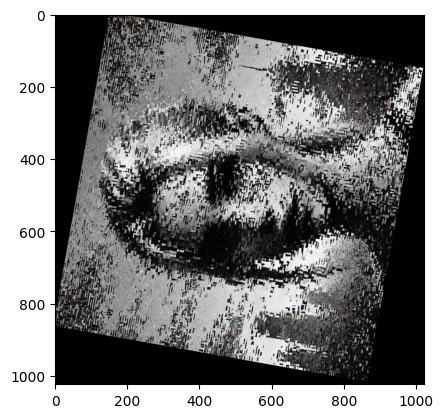

In [10]:
affine_tuple,ww,hh=affine_transform(goruntu,scale=(1.2,1.2),kayma=(0,0),donme=pi/4,translate=(10,10),aynalama=(-1,-1))
wp_goruntu = goruntu.transform((ww,hh) ,Image.AFFINE, affine_tuple)

imshow(wp_goruntu)